In [23]:
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore', '.*Explicit initial center position passed: performing only one init in KMeans instead of n_init.*', )

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML

In [24]:
# set whatever dataset you want and do the preproc ;)
# However: for this to work, we need to have only two features (we want to visualize the clustering)
from sklearn import datasets
dataset = datasets.load_iris()
df = pd.DataFrame(dataset['data'], columns=dataset.feature_names)
# target = pd.DataFrame(dataset['target'])
display(df.head())

# select the two features
df = df[['sepal length (cm)', 'sepal width (cm)']]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [25]:
# if you want to normalize, comment this out:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# df.describe()

In [26]:
# Settings for KMeans (feel free to modify as you want)
clust_num = 4
init = np.array([[0, 0], [1, 0], [0, 1], [2, 4]])

In [27]:
# algo
def fit_and_predict(model, df):
    model.fit(df)
    pred = model.predict(df)
    return np.array(pred), np.array(model.cluster_centers_)

def start_algo(df, clust_num=3, init=None):
    # max_iter=1 to keep track of iterations
    model = KMeans(clust_num, max_iter=1, init=init)
    p, c =  fit_and_predict(model, df)
    yield p, c
    prec_c = np.array([])
    prec_p = np.array([])
    while not np.array_equal(prec_p, p):
        prec_p = p
        prec_c = c
        

        model = KMeans(clust_num, init=prec_c, max_iter=1)
            
        p, c = fit_and_predict(model, df)
        yield p, c
    yield p, c

In [28]:
# TODO: you can also not hard set init. In this first step (this is just an example)
generator = start_algo(df, clust_num=clust_num, init=init)

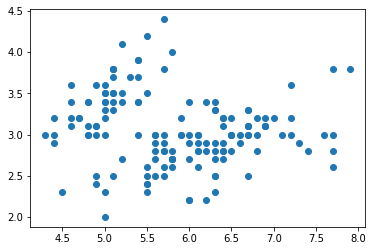

In [29]:
fig, ax = plt.subplots()
rects = ax.scatter(df[df.columns[0]], df[df.columns[1]])

In [30]:
iteration = [0]

In [31]:
def animate(A, iteration):
    
    ax.clear()
    ax.scatter(df[df.columns[0]], df[df.columns[1]], c=A[0])
    ax.scatter([i[0] for i in A[1]], [i[1] for i in A[1]], c='red')
    text = ax.text(0.01, 0.95, "", transform=ax.transAxes)
    
    iteration[0] += 1
    text.set_text("iterations : {}".format(iteration[0]))

In [32]:
anim = FuncAnimation(fig, func=animate,
                     fargs=(iteration,), frames=generator, interval=100,
                     repeat=False, save_count=20)

In [38]:
# This will output the animation
a = HTML(anim.to_jshtml())

In [39]:
a

23

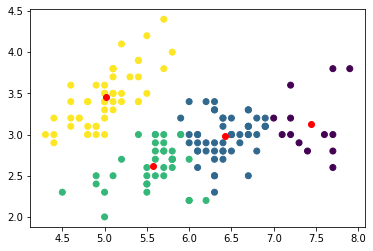

In [34]:
# Test if visualizer did right:
model = KMeans(clust_num, init=init)
l = model.fit_predict(df)
plt.scatter(df[df.columns[0]], df[df.columns[1]], c=l)
plt.scatter([i[0] for i in model.cluster_centers_], [i[1] for i in model.cluster_centers_], c='red')
model.n_iter_

In [ ]:
# with open("myvideo.html", "w") as f:
#     print(anim.to_jshtml(), file=f)